# EXPLORATORY DATA ANALYSIS (EDA)

## Preface

With the THPTQG 2025 score data at hand, in this notebook, I'll be conducting Exploratory Data Analysis (EDA) on the dataset, in particular:
- Graph score distribution of 9 common subjects and 5 common subject combinations
- See how subject scores are correlated with each other
- Gather insights

Stick with me because as a test taker myself who is aware of many problems with the exam, there will be some interesting insights we can discover from the data.

## Prerequisites
Make sure the file `thanhhoa_processed.csv` is located in `data/processed/`. If not, refer to the script files in `scripts/` for detailed instructions on how to get the dataset file.

## [Code] Load dependencies, dataset; Declare constants

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Dependencies loaded successfully")

path = "../data/processed/thanhhoa_processed.csv"
df = pd.read_csv(path, index_col="STT") # I didn't declare SBD and MA_TINH as `dtype = str` here as in script files, because no entries begin with leading zeros

print("Dataset loaded successfully")

SUBJ = ["TOAN", "VAN", "LI", "HOA", "SINH", "SU", "DIA", "KTPL", "T_ANH"]
COMB = ["A00", "A01", "B00", "C00", "D01"]

print("Constant lists declared")

Dependencies loaded successfully
Dataset loaded successfully
Constant lists declared


## [Code] Compare score distributions of subjects

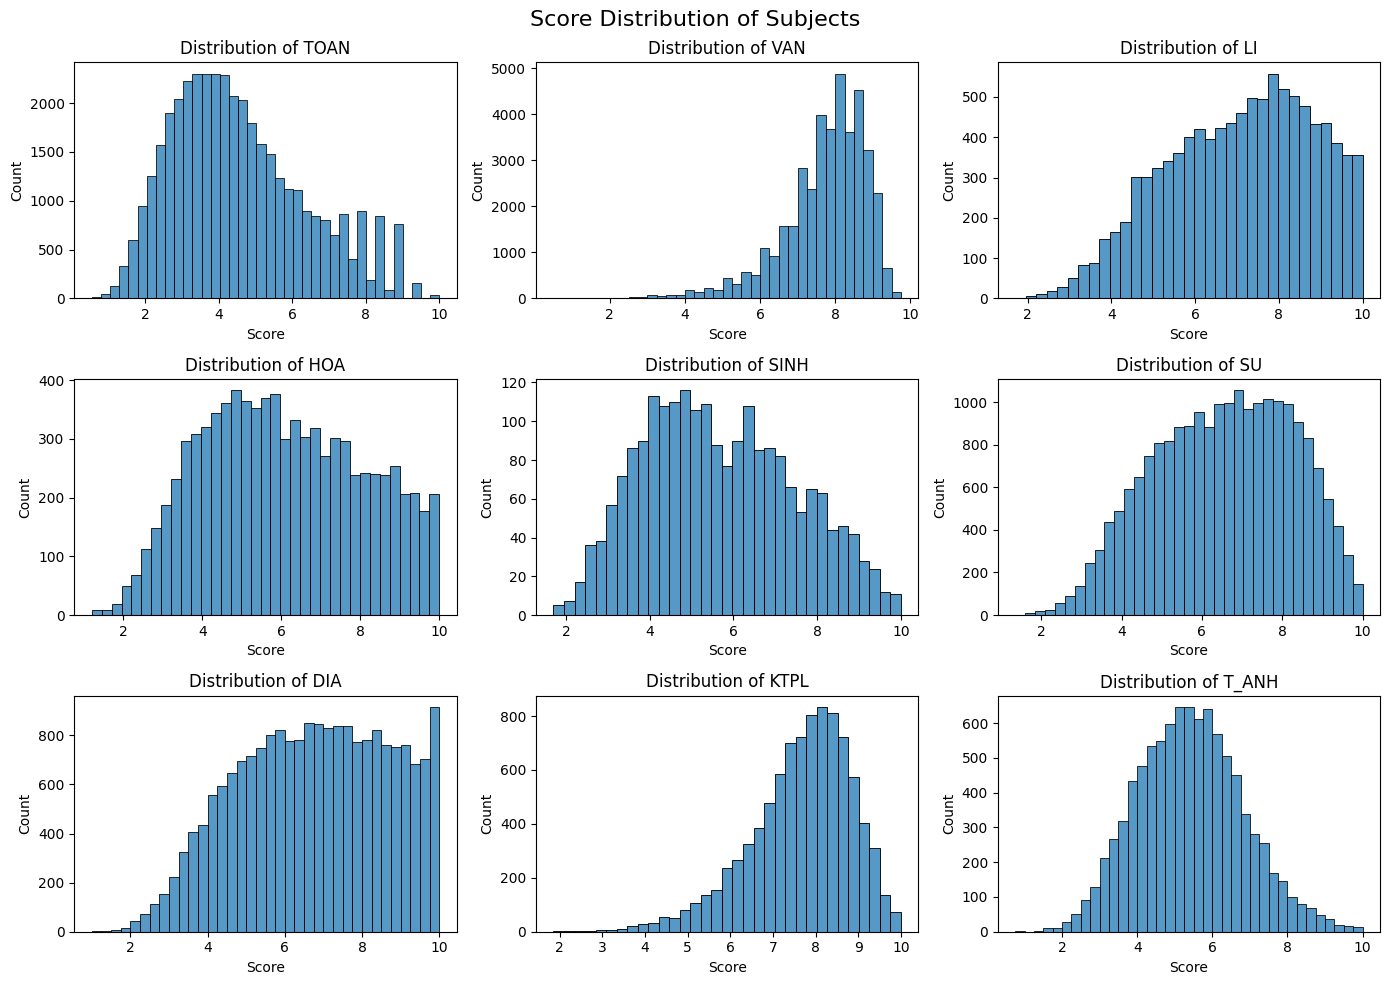

In [3]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))

for ax, subj in zip(axes.flat, SUBJ):
    sns.histplot(df[subj], kde=False, ax=ax, binwidth=0.25)
    ax.set_title(f"Distribution of {subj}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Count")

plt.suptitle("Score Distribution of Subjects", fontsize=16)
plt.tight_layout()
plt.show()

### Takeaway
- There exists a division between "tougher" subjects (`TOAN` - Math, `HOA` - Chemistry, `SINH` - Biology, `T_ANH` - English) - where the distribution centers around 3-6, and "easier" subjects (`VAN` - Literature, `LI` - Physics, `SU` - History, `DIA` - Geography, `KTPL` - Econs&Law) - where the distribution centers around 7-9.
- `TOAN` stands out as the hardest subject overall - the bulk of students only got around 3-4 marks.
- `T_ANH` shows a textbook bell-curve distribution with good spread, suggesting that the test is likely well-designed for assessment

=> The mix of different skewness patterns suggests that test design may differ widely across subjects.

## [Code] Compare score distributions of subject combinations

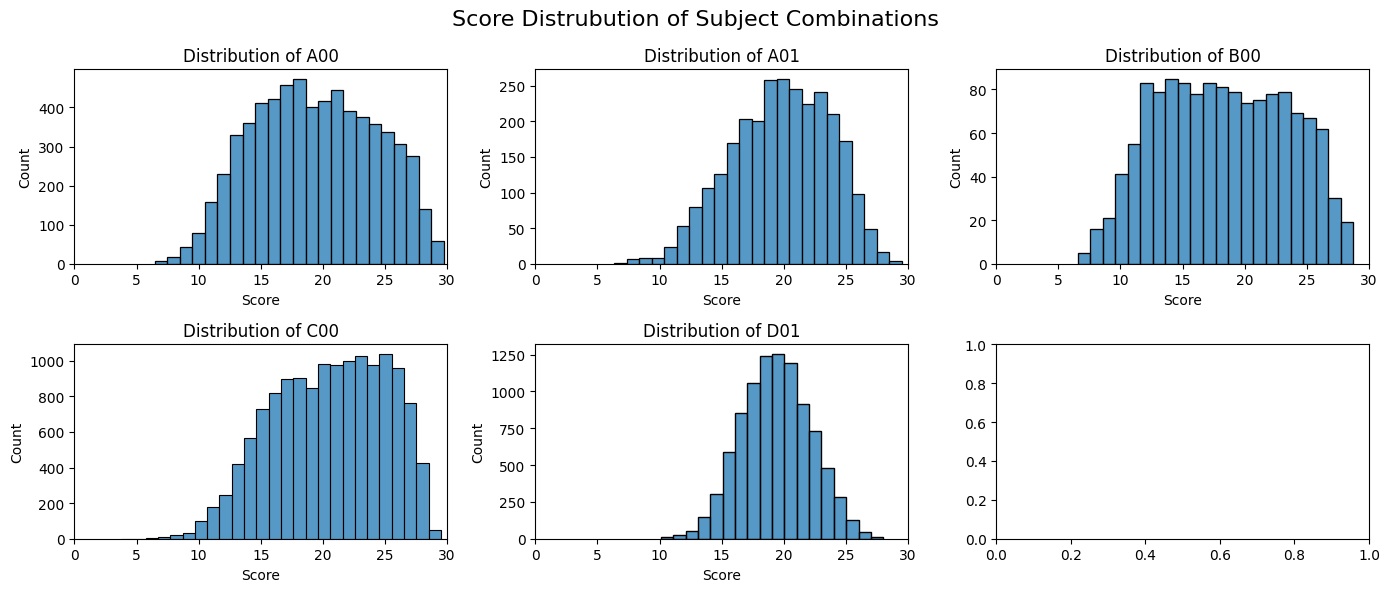

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

for ax, subj in zip(axes.flat, COMB):
    sns.histplot(df[subj], kde=False, bins=range(0, 31, 1), ax=ax, binwidth=1)
    ax.set_xlim(0, 30)
    ax.set_title(f"Distribution of {subj}")
    ax.set_xlabel("Score")
    ax.set_ylabel("Count")

plt.suptitle("Score Distrubution of Subject Combinations", fontsize=16)
plt.tight_layout()
plt.show()

### Takeaway
- `A00` (Math - Physics - Chemistry)
    - Fairly balanced, most students fall in the middle range
    - A noticeably higher number of students reaching 29+ scores than other combinations
- `A01` (Math - Physics - English)
    - More balanced, Gaussian-like than `A00`
- `B00` (Math - Chemistry - Biology)
    - Very flat distribution
    - In the heatmap you'll see below, this combination has a really high correlation between each subject pair (0.76-0.8). This suggests that students likely performed equally well or equally badly on 3 subjects, explaining the flat distribution
- `C00` (Literature - History - Geography)
    - Right-skewed distribution
    - This suggests more generous grading/ easier testing in the 3 subjects
- `D01` (Math - Literature - English)
    - Very Gaussian-like, with most students in the 18-20 range
    - Suggests an ideal grading distribution

=> However, the different distributions across these combinations suggest that for admission purposes, it may be unfair to give all these combinations equal weight.

## [Code] Correlation matrix of test results

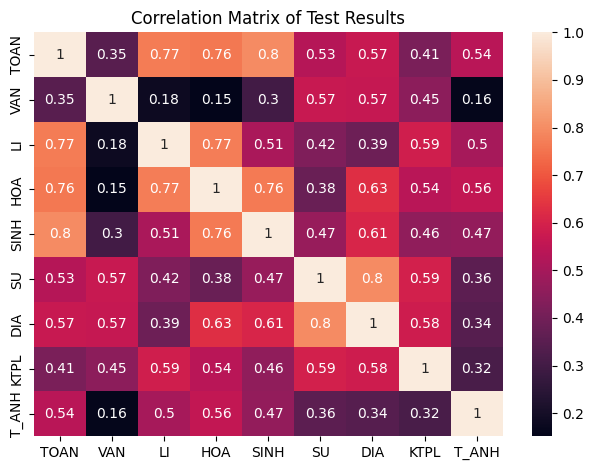

In [8]:
subjects = ["TOAN", "VAN", "LI", "HOA", "SINH", "SU", "DIA", "KTPL", "T_ANH"]

correlation_matrix = df[subjects].corr()

plt.figure()
plt.title("Correlation Matrix of Test Results")
sns.heatmap(data=correlation_matrix, annot=True)
plt.tight_layout()
plt.show()

### Takeaway

- There is strong subject ties among STEM subjects (`TOAN`, `LI`, `HOA`, `SINH`), and among Humanities subjects (`SU`, `DIA`)
- Students' performance in `VAN` (Literature) is very independent of STEM subjects (low correlation: < 0.35)
- Performance in Language subjects (`T_ANH` - English, `VAN` - Literature)) likely doesn't imply performance elsewhere (low to moderate correlation: 0.15-0.57)

## Important Insights

- Score distributions across subjects and subject combinations are vastly different. This suggests that these subjects/ subject combinations should not be weighted on the same scale during university admissions to ensure fairness, which also means the data should undergo some type of normalization.
- There is strong correlations among subjects in STEM block and Humanities block. This suggests that either: (1) proficiency in one subject is transferrable to other subjects in the same block; or (2) students tend to work on one subject block only.
- Each language subject's proficiency tends to be an independent skillset, and doesn't imply performance on other subjects.